In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("landTemp.csv")


In [3]:
df.head()

,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [4]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,191994.000000,191994.000000
mean,19.074293,1.148474
std,11.705712,3.374958
min,-26.772000,0.049000
25%,13.399000,0.329000
50%,20.857000,0.549000
75%,26.112000,1.151000
max,88.007000,41.588600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219575 entries, 0 to 219574
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date                           219575 non-null  object 
 1   AverageTemperature             191994 non-null  float64
 2   AverageTemperatureUncertainty  191994 non-null  float64
 3   City                           219575 non-null  object 
 4   Country                        219575 non-null  object 
 5   Latitude                       219575 non-null  object 
 6   Longitude                      219575 non-null  object 
dtypes: float64(2), object(5)
memory usage: 11.7+ MB


In [6]:
# number of null values
df.isna().sum()


Date                                 0
AverageTemperature               27581
AverageTemperatureUncertainty    27581
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [7]:
def fillNull(df, index, col):
    if pd.isnull(df[col][index]):
        # Find the nearest non-null values
        prev_index = index - 1
        next_index = index + 1
        while pd.isnull(df[col][prev_index]) and prev_index >= 0:
            prev_index -= 1
        while pd.isnull(df[col][next_index]) and next_index < len(df):
            next_index += 1

        prev_val = df[col][prev_index] if prev_index >= 0 else 0
        next_val = df[col][next_index] if next_index < len(df) else 0

        mean = (prev_val + next_val) / 2
        df.at[index, col] = mean


In [8]:
for col in ['AverageTemperature', 'AverageTemperatureUncertainty']:
    for index, row in df.iterrows():
        fillNull(df, index, col)

In [9]:
df.isna().sum()

Date                             0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [10]:
df.head()

,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.4350,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.3620,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,26.787,1.3745,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.3870,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.2000,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [11]:
def hotestColdest(df,city):
    print(f'Hotest Temprature f{df[df["City"] == city]["AverageTemperature"].max()}' )
    print(f'Coldest Temprature f{df[df["City"] == city]["AverageTemperature"].min()}' )
    

In [12]:
hotestColdest(df,"Abidjan")


Hotest Temprature f29.923
Coldest Temprature f22.363000000000003


(array([ 42., 272., 378., 316., 226., 244., 214., 319., 302.,  39.]),
 array([-1.441 ,  1.2982,  4.0374,  6.7766,  9.5158, 12.255 , 14.9942,
        17.7334, 20.4726, 23.2118, 25.951 ]),
 <BarContainer object of 10 artists>)

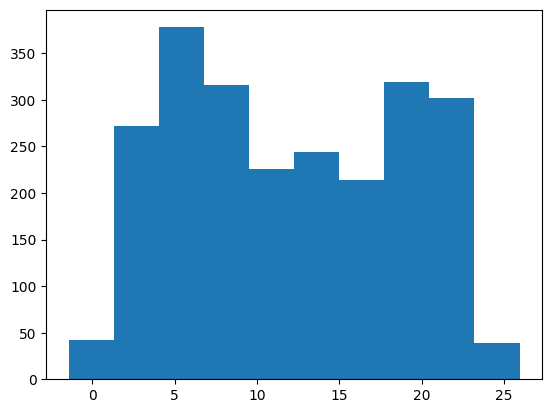

In [13]:
plt.hist(df[df["City"] == "Rome"]["AverageTemperature"])

(array([ 14.,  48., 157., 322., 256., 419., 595., 357., 140.,  44.]),
 array([71.4092 , 73.06898, 74.72876, 76.38854, 78.04832, 79.7081 ,
        81.36788, 83.02766, 84.68744, 86.34722, 88.007  ]),
 <BarContainer object of 10 artists>)

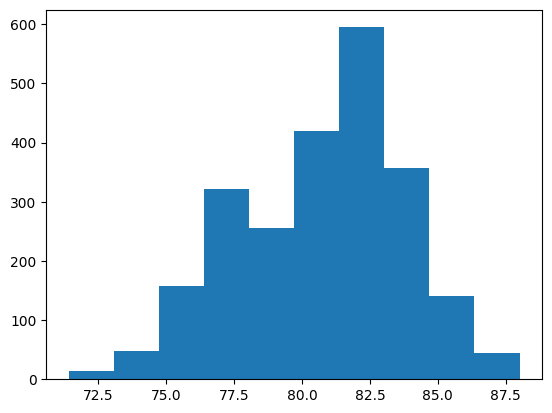

In [14]:
plt.hist(df[df["City"] == "Bangkok"]["AverageTemperature"])

In [15]:
df.loc[df['City'] == 'Bangkok', 'AverageTemperature'] = (df.loc[df['City'] == 'Bangkok', 'AverageTemperature'] - 32) / 1.8


(array([ 14.,  48., 157., 322., 256., 419., 595., 357., 140.,  44.]),
 array([21.894 , 22.8161, 23.7382, 24.6603, 25.5824, 26.5045, 27.4266,
        28.3487, 29.2708, 30.1929, 31.115 ]),
 <BarContainer object of 10 artists>)

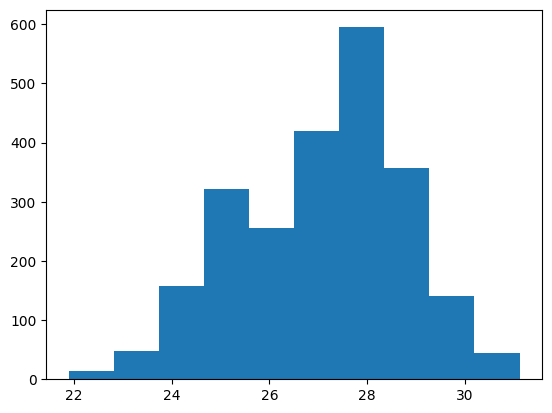

In [16]:
plt.hist(df[df["City"] == "Bangkok"]["AverageTemperature"])